<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

In [0]:
# train set을 shuffle하여 다시 train set과 validation set으로 분리합니다.

train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=42)

# Model 9

* 6 layers
* (239, 252, 265, 178, 91) units, he_normal, relu
* BatchNormalization
* Dropout(0.15)
* Adam(0.008)
* epochs 300
* batch_size 1000
<br><br>
* layer층을 다시 복귀시킴
* Dropout의 rate를 줄이고 다시 도입하여 overfitting 억제 시도
* 대신 epochs를 대폭 늘려 가중치의 업데이트량을 증가시킴
* sklearn의 train_test_split을 사용하여 train set과 validation set을 랜덤하게 추출
* Model 1~8까지의 모델은 validation set을 train set의 끝에서 일정한 비율로 추출한 것이기 때문에, 그리고 너무 적은 비율로 추출했기 때문에 overfitting이 발생한 것처럼 보인 것이다. 하지만 이번 모델의 실험으로 알 수 있듯이 validation set을 랜덤하게 적절한 비율로 추출하면 실제 지금까지의 모델은 overfitting 문제는 아니라는 것을 알 수 있다. 따라서 Dropout의 필요성이 줄어들었고 모델을 정교하게 만드는 작업이 필요하다.

In [0]:
# 케라스를 통해 모델 생성을 시작합니다.

model_09 = Sequential()
model_09.add(Dense(units=239, input_dim=226, kernel_initializer='he_normal'))
model_09.add(BatchNormalization())
model_09.add(Activation('relu'))
model_09.add(Dropout(0.15))
model_09.add(Dense(units=252, kernel_initializer='he_normal'))
model_09.add(BatchNormalization())
model_09.add(Activation('relu'))
model_09.add(Dropout(0.15))
model_09.add(Dense(units=265, kernel_initializer='he_normal'))
model_09.add(BatchNormalization())
model_09.add(Activation('relu'))
model_09.add(Dropout(0.15))
model_09.add(Dense(units=178, kernel_initializer='he_normal'))
model_09.add(BatchNormalization())
model_09.add(Activation('relu'))
model_09.add(Dropout(0.15))
model_09.add(Dense(units=91, kernel_initializer='he_normal'))
model_09.add(BatchNormalization())
model_09.add(Activation('relu'))
model_09.add(Dense(units=4, activation='linear'))

adam = keras.optimizers.Adam(0.008)
model_09.compile(loss='mae', optimizer=adam, metrics=['accuracy'])

hist = model_09.fit(train_X, train_Y, epochs=300, batch_size=1000,
                    validation_data=(val_X, val_Y))

Train on 455625 samples, validate on 151875 samples
Epoch 1/300
455625/455625 [==============================] - 12s 26us/step - loss: 65.5288 - acc: 0.3779 - val_loss: 53.9699 - val_acc: 0.4761
Epoch 2/300
455625/455625 [==============================] - 8s 18us/step - loss: 32.5035 - acc: 0.6578 - val_loss: 25.8295 - val_acc: 0.7298
Epoch 3/300
455625/455625 [==============================] - 8s 18us/step - loss: 25.8306 - acc: 0.7255 - val_loss: 19.6148 - val_acc: 0.7798
Epoch 4/300
455625/455625 [==============================] - 8s 18us/step - loss: 23.0458 - acc: 0.7533 - val_loss: 16.6097 - val_acc: 0.8138
Epoch 5/300
455625/455625 [==============================] - 8s 18us/step - loss: 21.4745 - acc: 0.7680 - val_loss: 14.5139 - val_acc: 0.8423
Epoch 6/300
455625/455625 [==============================] - 8s 18us/step - loss: 20.3485 - acc: 0.7801 - val_loss: 13.5515 - val_acc: 0.8540
Epoch 7/300
455625/455625 [==============================] - 8s 18us/step - loss: 19.5325 - acc

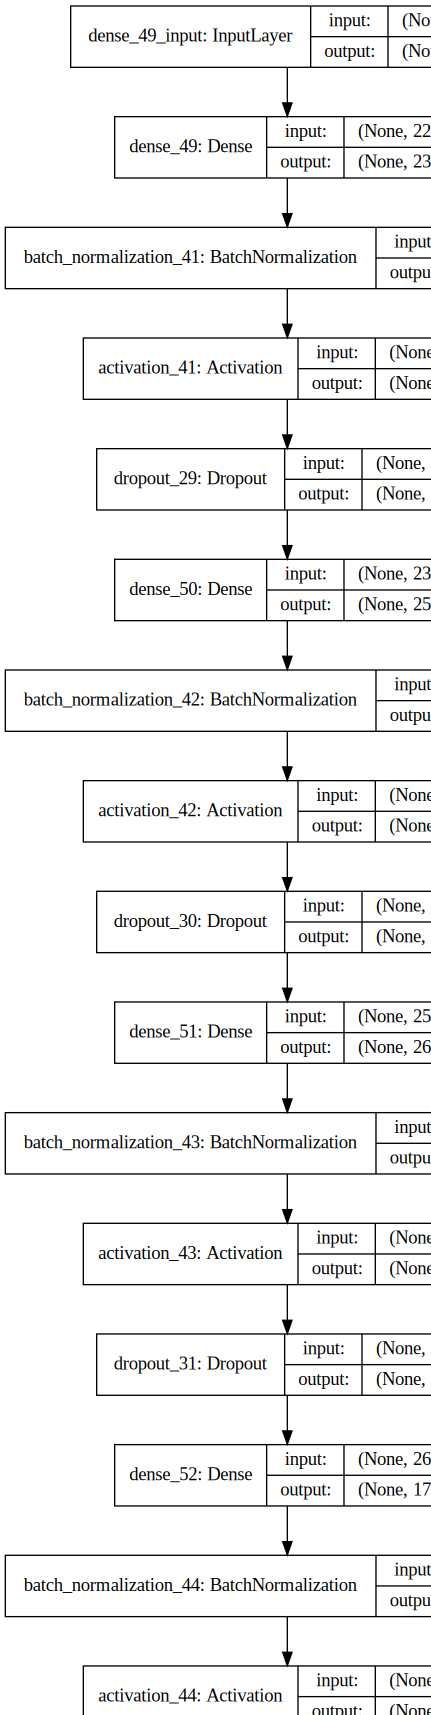

In [0]:
# 모델 아키텍처

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model_09, show_shapes=True).create(prog='dot', format='svg'))

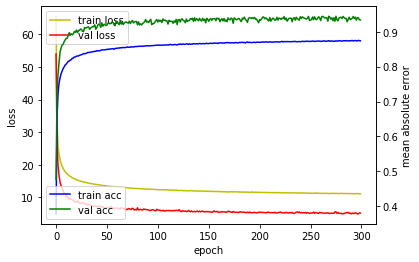

In [0]:
# 학습 과정

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test_09 = model_09.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test_09
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_09.csv')